In [1]:
#import the packages
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [2]:
today = date.today()
ticker1 = 'TQQQ' 
start_date = '2014-01-02'
end = today
df = pdr.get_data_yahoo(ticker1, start_date, end, interval='1mo')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-01,2.407917,2.857500,2.208333,2.794167,2.697577,985816800
2014-03-01,2.718333,2.892083,2.453333,2.560417,2.471907,1496923200
2014-04-01,2.601667,2.740417,2.174167,2.508333,2.421624,2643266400
2014-05-01,2.519583,2.861667,2.347500,2.847083,2.748664,1482350400
2014-06-01,2.858333,3.140000,2.785000,3.115833,3.008124,1018502400
...,...,...,...,...,...,...
2024-08-01,68.580002,73.160004,48.799999,68.610001,68.389755,1469084800
2024-09-01,66.349998,75.070000,56.720001,72.489998,72.257301,1071837000
2024-10-01,72.279999,77.459999,67.699997,69.449997,69.449997,1027385900


In [17]:
months = []
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if df['Close'][j] >= df['Close'][i] * 2:
            tuple_date_i = tuple(df.index[i].date().timetuple()[:3])
            tuple_date_j = tuple(df.index[j].date().timetuple()[:3])
            print('from', tuple_date_i, 'to', tuple_date_j, 'in', j-i, 'months.')
            months.append(j-i)
            break

print('average months:', np.mean(months))


from (2014, 2, 1) to (2017, 1, 1) in 35 months.
from (2014, 3, 1) to (2016, 9, 1) in 30 months.
from (2014, 4, 1) to (2015, 7, 1) in 15 months.
from (2014, 5, 1) to (2017, 1, 1) in 32 months.
from (2014, 6, 1) to (2017, 2, 1) in 32 months.
from (2014, 7, 1) to (2017, 2, 1) in 31 months.
from (2014, 8, 1) to (2017, 4, 1) in 32 months.
from (2014, 9, 1) to (2017, 3, 1) in 30 months.
from (2014, 10, 1) to (2017, 4, 1) in 30 months.
from (2014, 11, 1) to (2017, 5, 1) in 30 months.
from (2014, 12, 1) to (2017, 5, 1) in 29 months.
from (2015, 1, 1) to (2017, 4, 1) in 27 months.
from (2015, 2, 1) to (2017, 8, 1) in 30 months.
from (2015, 3, 1) to (2017, 5, 1) in 26 months.
from (2015, 4, 1) to (2017, 7, 1) in 27 months.
from (2015, 5, 1) to (2017, 8, 1) in 27 months.
from (2015, 6, 1) to (2017, 7, 1) in 25 months.
from (2015, 7, 1) to (2017, 10, 1) in 27 months.
from (2015, 8, 1) to (2017, 4, 1) in 20 months.
from (2015, 9, 1) to (2017, 3, 1) in 18 months.
from (2015, 10, 1) to (2017, 10, 1) 

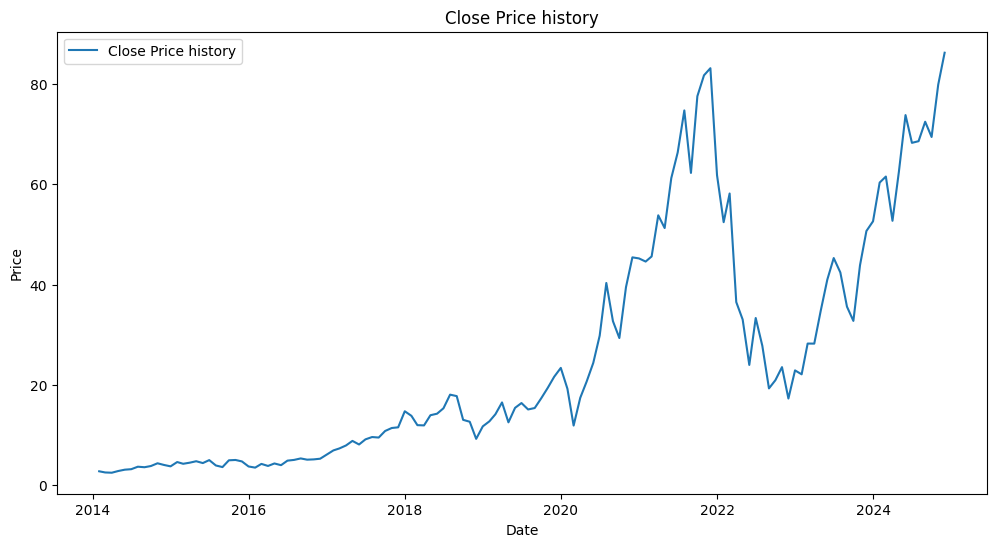

In [4]:
# importar matplotlib y graficar los close
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price history')
plt.title('Close Price history')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [14]:
# Timestamp('2014-02-01 00:00:00') get only date without hours
tuple(df.index[0].date().timetuple()[:3])

(2014, 2, 1)